In [3]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [8]:
#Creating data
slay = 12.085
nepotism = 69

X = torch.arange(0, 50, 0.1).unsqueeze(dim=1) #remember to unsqueeze.
#Y is usually something that we found a correlation with. In this case, we are going to assume that
# the linear formula is a good fit.
Y = slay*X + nepotism

#split the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.3)


In [22]:
X

tensor([[ 0],
        [ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10],
        [11],
        [12],
        [13],
        [14],
        [15],
        [16],
        [17],
        [18],
        [19],
        [20],
        [21],
        [22],
        [23],
        [24],
        [25],
        [26],
        [27],
        [28],
        [29],
        [30],
        [31],
        [32],
        [33],
        [34],
        [35],
        [36],
        [37],
        [38],
        [39],
        [40],
        [41],
        [42],
        [43],
        [44],
        [45],
        [46],
        [47],
        [48],
        [49],
        [50],
        [51],
        [52],
        [53],
        [54],
        [55],
        [56],
        [57],
        [58],
        [59],
        [60],
        [61],
        [62],
        [63],
        [64],
        [65],
        [66],
        [67],
        [68],
        [69],
        [70],
      

In [23]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.slay =  nn.Parameter(torch.randn(1, requires_grad=True)) #the slay factor parameter
        self.nepotism = nn.Parameter(torch.randn(1, requires_grad=True)) #how nepotism can boost them

        

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.slay * x + self.nepotism


In [47]:
#we can transform the above model to use layers instead of defining parameters bu ourselves.
class LinRegMod(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    #overwriting the forward() function:
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

torch.manual_seed(42)

#please call model only once. calling it again will reset the weights.
model = LinRegMod()

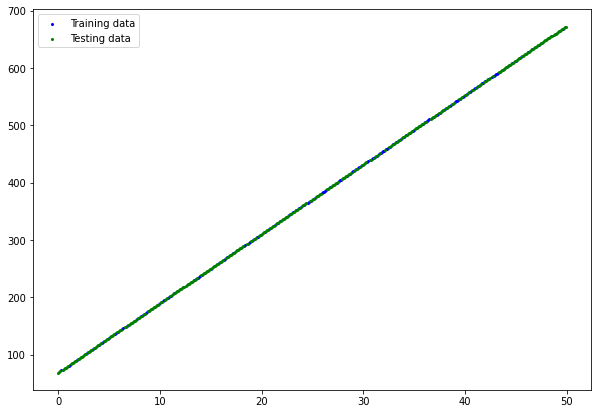

In [11]:
def plotPred(train_data=X_train, 
             train_labels=y_train,
             test_data=X_test,
             test_labels=y_test,
             predictions=None):
    plt.figure(figsize=(10,7))

    plt.scatter(train_data, train_labels, c='b', s=4, label="Training data")
    plt.scatter(test_data, test_labels, c='g', s=4, label="Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", label = "Predictions")
    plt.legend(prop={"size":10})

plotPred()

In [128]:
#separate cell to define these functions first. we only need to call them once. 
#do not assign again.

#Setting loss function and optimizers.
#Since it's a linreg problem, we can use L1Loss & SGD for optim. 


loss_fn = nn.L1Loss()
optim = torch.optim.SGD(params=model.parameters(), lr=0.01) #setting the lr to 0.01 first, so that we dont need many epochs to train our data.

OrderedDict([('linear_layer.weight', tensor([[12.3483]])), ('linear_layer.bias', tensor([68.9310]))])
Epoch: 0 
Loss: 6.330869197845459
OrderedDict([('linear_layer.weight', tensor([[12.3483]])), ('linear_layer.bias', tensor([68.9310]))])
Epoch: 100 
Loss: 6.330869197845459
OrderedDict([('linear_layer.weight', tensor([[12.3483]])), ('linear_layer.bias', tensor([68.9310]))])
Epoch: 200 
Loss: 6.330869197845459
OrderedDict([('linear_layer.weight', tensor([[12.3483]])), ('linear_layer.bias', tensor([68.9310]))])
Epoch: 300 
Loss: 6.330869197845459
OrderedDict([('linear_layer.weight', tensor([[12.3483]])), ('linear_layer.bias', tensor([68.9310]))])
Epoch: 400 
Loss: 6.330869197845459
OrderedDict([('linear_layer.weight', tensor([[12.3483]])), ('linear_layer.bias', tensor([68.9310]))])
Epoch: 500 
Loss: 6.330869197845459
OrderedDict([('linear_layer.weight', tensor([[12.3483]])), ('linear_layer.bias', tensor([68.9310]))])
Epoch: 600 
Loss: 6.330869197845459
OrderedDict([('linear_layer.weight',

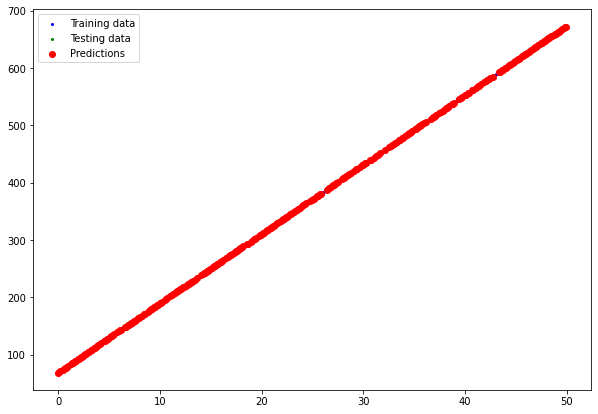

In [130]:
#new cell for training
epoch = 2000
for epoch in range(epoch):
    model.train()
    y_train_model = model(X_train)
    loss = loss_fn(y_train_model, y_train) #compares the predicted values with actual values, to determine the loss value
    
    optim.zero_grad() #clears the previous calculated gradients, if not it will acuumulate

    loss.backward() #calculates gradient. gotta be closer to 0!

    optim.step() #perform SGD


    #Testing!
    model.eval()
    with torch.inference_mode():
        y_test_model = model(X_test)
        loss = loss_fn(y_test_model, y_test)

        if epoch % 100 == 0:

            print(model.state_dict())
            print(f'Epoch: {epoch} \nLoss: {loss}')
            
with torch.inference_mode():
    plotPred(predictions=model(X_test))

    

